shootings:
https://catalog.data.gov/dataset/nypd-shooting-incident-data-historic

education:
https://data.nysed.gov/downloads.php

employment:
https://data.ers.usda.gov/reports.aspx?ID=17828

population:
https://www.health.ny.gov/statistics/vital_statistics/2010/table02.htm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Question 5**:
How does the dropout rate compare to median household income, aggregated across each of the 62 counties in the state of New York? (Hassan)
For this question, we’ll first concatenate all the graduation data files together (something that we have to do for questions 3 and 4 as well). A couple of the CSV files have extra columns that aren’t necessary or present in the others, so we’ll need to remove these first, then stack the data sets vertically. After this, we’ll filter by the aggregation_type again. Instead of filtering by a statewide aggregation, we’ll look for variation across the 62 different counties of New York state, and we’ll take the mean graduation percentage for the years 2015-2020 per county. We’ll also filter by subgroup and select the ‘All Students’ value to ensure we’re not including categorical variables such as gender, ethnicity, etc. in this question. This will create a data set that is 62 rows long, one for each NY county. The variable we will be using to compare each one will be dropout_pct. We’ll then need to merge another data to it that lists the median income by county. We anticipate that we will see a trend that is inversely proportional between income and highschool dropout rates after plotting a line graph with income on the x axis and student dropout percentage on the y axis.

In [2]:
grad15 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2015.csv', dtype = str)
grad16 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2016.csv', dtype = str)
grad17 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2017.csv', dtype = str)
grad18 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2018.csv', dtype = str)
grad19 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2019.csv', dtype = str)
grad20 = pd.read_csv('GRAD_RATE_AND_OUTCOMES_2020.csv', dtype = str)
shootings = pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv", dtype = str)

In [3]:
for i in [grad15, grad16, grad17, grad18]:
    i.columns = map(str.lower, i.columns)

In [4]:
stack = [grad15, grad16, grad17, grad18, grad19, grad20]
stack = pd.concat(stack)
stack.shape

(902427, 37)

In [5]:
stack['year'] = stack['report_school_year'].str[-2:]

In [6]:
# stack.dropna(subset = ['county_name'], inplace = True)
stack = stack[stack['dropout_pct']!='-']
stack['dropout_pct']= [int(x[:-1]) for x in stack['dropout_pct']]
stack['ged_pct']= [int(x[:-1]) for x in stack['ged_pct']]

In [7]:
stack = stack[['year','aggregation_type','county_name','subgroup_name','enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct',
       'reg_cnt', 'reg_pct', 'reg_adv_cnt','membership_code', 'reg_adv_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct']]
stack.index = range(0, stack.shape[0])

In [8]:
agg_counties = stack[(stack.aggregation_type == 'County') & (stack.membership_code == '9')].reset_index()


agg_gender = stack[(stack.aggregation_type == 'County') & (stack.membership_code == '9') & ((stack.subgroup_name == 'Male') | 
              (stack.subgroup_name == 'Female'))].reset_index()


#USE THIS ONE FOR QUESTION 1
agg_all_students = stack[(stack.aggregation_type == 'County') & (stack.membership_code == '9') & 
                         (stack.subgroup_name == 'All Students')].reset_index()


agg_state_gender = stack[(stack.aggregation_type == 'Statewide') & (stack.membership_code == '9') & ((stack.subgroup_name == 'Male') | 
              (stack.subgroup_name == 'Female'))].reset_index()

In [9]:
money = pd.read_csv('UnemploymentReport.csv', header = 2, 
                    usecols = ['Name','Median Household Income (2019)','% of State Median HH Income'])
money.columns = ['county_name','dollars','perc_of_NY']
money

,county_name,dollars,perc_of_NY
0,New York,"$72,038",100.0%
1,"Albany County, NY","$69,408",96.3%
2,"Allegany County, NY","$49,411",68.6%
3,"Bronx County, NY","$41,470",57.6%
4,"Broome County, NY","$52,179",72.4%
...,...,...,...
60,"Westchester County, NY","$101,741",141.2%
61,"Wyoming County, NY","$58,214",80.8%
62,"Yates County, NY","$60,612",84.1%
63,NaN,NaN,NaN


In [10]:
income = money[1:63].copy()
income.county_name = income.county_name.str[:-11].str.upper()
income.dollars = income.dollars.str.replace('$','').str.replace(',','').astype('int64')
income.perc_of_NY = income.perc_of_NY.str.replace('%','').astype('float64')
income.columns = map(str.lower, income.columns)
income

,county_name,dollars,perc_of_ny
1,ALBANY,69408,96.3
2,ALLEGANY,49411,68.6
3,BRONX,41470,57.6
4,BROOME,52179,72.4
5,CATTARAUGUS,50783,70.5
...,...,...,...
58,WASHINGTON,56897,79.0
59,WAYNE,61989,86.1
60,WESTCHESTER,101741,141.2
61,WYOMING,58214,80.8


In [11]:
agg_all_students = agg_all_students.merge(income)
agg_all_students

,index,year,aggregation_type,county_name,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,membership_code,reg_adv_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,dollars,perc_of_ny
0,583,15,County,ALBANY,All Students,3093,2517,81%,63,2%,...,9,40%,297,10%,7,0,228,7,69408,96.3
1,73017,16,County,ALBANY,All Students,3220,2628,82%,91,3%,...,9,39%,278,9%,4,0,265,8,69408,96.3
2,145403,17,County,ALBANY,All Students,3014,2508,83%,110,4%,...,9,43%,263,9%,3,0,200,7,69408,96.3
3,218954,18,County,ALBANY,All Students,3159,2675,85%,119,4%,...,9,44%,195,6%,11,0,226,7,69408,96.3
4,295620,19,County,ALBANY,All Students,3084,2610,85%,140,5%,...,9,44%,236,8%,8,0,204,7,69408,96.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,76066,16,County,YATES,All Students,219,178,81%,14,6%,...,9,24%,16,7%,0,0,21,10,60612,84.1
362,218234,17,County,YATES,All Students,214,163,76%,6,3%,...,9,29%,16,7%,0,0,31,14,60612,84.1
363,294398,18,County,YATES,All Students,173,132,76%,6,3%,...,9,30%,20,12%,0,0,18,10,60612,84.1
364,301241,19,County,YATES,All Students,177,147,83%,14,8%,...,9,29%,16,9%,0,0,12,7,60612,84.1


In [18]:
income_dropout =  agg_all_students[['county_name','dropout_pct','dollars','perc_of_ny']].groupby('county_name').mean()
income_dropout.sort_values('dollars').tail(10) #FINAL DATAFRAME FOR PLOTTING Q5


,dropout_pct,dollars,perc_of_ny
county_name,,,
ORANGE,5.500000,83188.0,115.5
DUTCHESS,6.500000,84564.0,117.4
RICHMOND,5.666667,86624.0,120.2
SARATOGA,4.333333,89071.0,123.6
NEW YORK,6.833333,93007.0,129.1
ROCKLAND,5.333333,99831.0,138.6
WESTCHESTER,2.666667,101741.0,141.2
SUFFOLK,3.500000,105241.0,146.1
PUTNAM,2.000000,105600.0,146.6


Text(87500, 5.7, 'Richmond County')

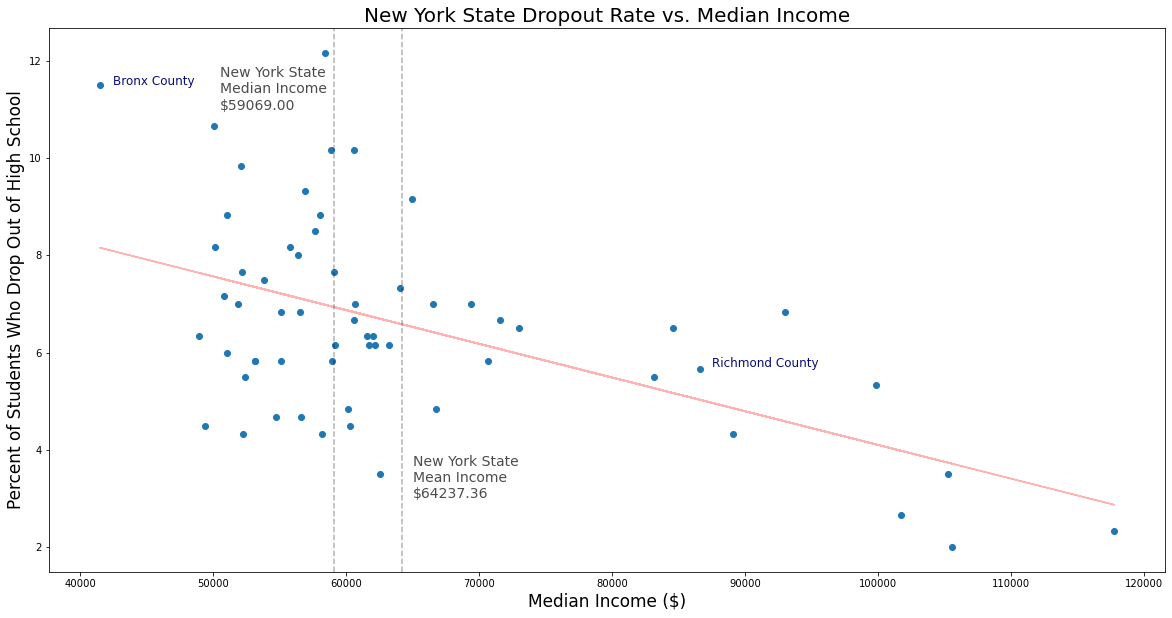

In [22]:
n,c = np.polyfit(income_dropout.perc_of_ny, income_dropout.dropout_pct,1)
m,b = np.polyfit(income_dropout.dollars, income_dropout.dropout_pct,1)

fig, ax = plt.subplots(1,1, figsize = (20,10))

# ax.scatter(income_dropout.perc_of_ny, income_dropout.dropout_pct, color = '#FF33EC')
# ax.plot(income_dropout.perc_of_ny, n*income_dropout.perc_of_ny+c, color = 'green')
# ax.set_title('NY Dropout Percent vs. Income', size = 20)
# ax.set_xlabel('Income as a Percentage of State Median', size = 15)
# ax.set_ylabel('Percent of Students Who Drop Out of High School', size = 15)


ax.scatter(income_dropout.dollars, income_dropout.dropout_pct)
ax.plot(income_dropout.dollars, m*income_dropout.dollars+b,color = 'red', alpha = .3)
ax.set_title('New York State Dropout Rate vs. Median Income', size = 20)
ax.set_xlabel('Median Income ($)', size = 17)
ax.set_ylabel('Percent of Students Who Drop Out of High School', size = 17)
plt.axvline(x=income_dropout.dollars.median(), linestyle = '--', color = 'black', alpha = .3)
ax.text(50500, 11, f'New York State\nMedian Income\n${income_dropout.dollars.median():.2f}', size = 14, alpha = .7)
ax.axvline(x=income_dropout.dollars.mean(), linestyle = '--', color = 'black', alpha = .3)
ax.text(65000, 3, f'New York State\nMean Income\n${income_dropout.dollars.mean():.2f}', size = 14, alpha = .7)
ax.text(42500, 11.5, 'Bronx County', color = '#090E75', size = 12)
ax.text(87500, 5.7, 'Richmond County', color = '#090E75', size = 12)

In [265]:
print(n, '\n', c)

-0.04995226234950019 
 11.036398791415428


**Question 6**:
How does the shooting rate compare to median household income, aggregated across each of the 5 counties in the City of New York? (Hassan)
For this question, we don’t have access to shootings on a county level. It looks like the aggregation of shootings data is only specific to a ‘boroughs’ level, with New York State having six in total (Manhattan, The Bronx, Brooklyn, etc.). There might be a way to access more specificity via the Precincts column, in which case we could merge this data set against another that lists all the NY precincts and what counties they’re in. We have yet to find a dataframe that lists this.
We’ll create a scatter or line plot that shows the median income level per region on the x axis, and plot the rate of average number of shootings per unit of time (likely per month) on the y axis. We also anticipate that we will see an inverse relationship across these two variables.

In [266]:
shootings = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [267]:
county_boro = {'county_name':['QUEENS','BRONX','NEW YORK','RICHMOND','KINGS'], 
               'BORO':['QUEENS', 'BRONX', 'MANHATTAN', 'STATEN ISLAND', 'BROOKLYN'],
              'population':[2230722, 1385108, 1585873, 468730, 2504700]}


df_county_boro = pd.DataFrame.from_dict(county_boro)
df_county_boro

,county_name,BORO,population
0,QUEENS,QUEENS,2230722
1,BRONX,BRONX,1385108
2,NEW YORK,MANHATTAN,1585873
3,RICHMOND,STATEN ISLAND,468730
4,KINGS,BROOKLYN,2504700


In [268]:
shootings = shootings.merge(df_county_boro).merge(income)

In [269]:
shootings_income= shootings.copy()[['county_name','BORO','population','OCCUR_DATE','OCCUR_TIME','dollars','perc_of_ny']]
shootings_income['occurences'] =1
shootings_income.columns = map(str.lower, shootings_income.columns)
shootings_income.sort_values('occur_date') #need to standardize by population

,county_name,boro,population,occur_date,occur_time,dollars,perc_of_ny,occurences
11702,NEW YORK,MANHATTAN,1585873,01/01/2006,2:22:00,93007,129.1,1
535,QUEENS,QUEENS,2230722,01/01/2006,2:34:00,72975,101.3,1
9647,BRONX,BRONX,1385108,01/01/2006,2:00:00,41470,57.6,1
805,QUEENS,QUEENS,2230722,01/01/2006,19:00:00,72975,101.3,1
1100,QUEENS,QUEENS,2230722,01/01/2006,2:34:00,72975,101.3,1
...,...,...,...,...,...,...,...,...
13919,KINGS,BROOKLYN,2504700,12/31/2019,20:14:00,66501,92.3,1
12989,NEW YORK,MANHATTAN,1585873,12/31/2020,23:45:00,93007,129.1,1
3462,QUEENS,QUEENS,2230722,12/31/2020,14:59:00,72975,101.3,1
3330,QUEENS,QUEENS,2230722,12/31/2020,19:27:00,72975,101.3,1


In [280]:
grouped_shootings = shootings_income.groupby('county_name').agg({'population':'mean',
                                             'dollars':'mean',
                                             'perc_of_ny':'mean',
                                             'occurences':'sum'})
grouped_shootings.sort_values('occurences', ascending = False) #FINAL DATAFRAME FOR PLOTTING Q6
grouped_shootings['occurences_per_1000'] = round(1000*grouped_shootings.occurences/grouped_shootings.population,3)
grouped_shootings.sort_values('dollars')
grouped_shootings.index.rename('County', inplace = True)
grouped_shootings.columns = ['population','dollars','% of NY', 'occurences', 'Per 1000']
grouped_shootings

,population,dollars,% of NY,occurences,Per 1000
County,,,,,
BRONX,1385108,41470,57.6,6700,4.837
KINGS,2504700,66501,92.3,9722,3.882
NEW YORK,1585873,93007,129.1,2921,1.842
QUEENS,2230722,72975,101.3,3527,1.581
RICHMOND,468730,86624,120.2,698,1.489


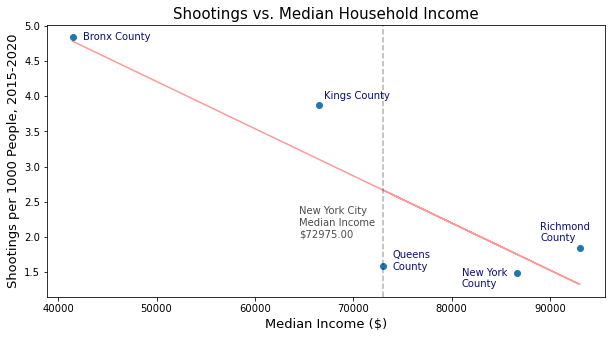

In [281]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(grouped_shootings.dollars, 1000*grouped_shootings.occurences/grouped_shootings.population)
beta1,beta0 = np.polyfit(grouped_shootings.dollars, 1000*grouped_shootings.occurences/grouped_shootings.population,1)
ax.plot(grouped_shootings.dollars, beta0+ beta1*grouped_shootings.dollars, color = 'r',alpha = .4)
ax.set_title('Shootings vs. Median Household Income', size = 15)
ax.set_ylabel('Shootings per 1000 People, 2015-2020', size = 13)
ax.set_xlabel('Median Income ($)', size = 13)
ax.text(67000, beta0+ beta1*67000+.9, 'Kings County', color = '#090E75')
ax.text(42500, beta0 + beta1*42000+.05, 'Bronx County', color = '#090E75')
ax.text(74000, beta0 +beta1*60000-2, 'Queens\nCounty', color = '#090E75')
ax.text(81000, beta0 +beta1*60000-2.255, 'New York\nCounty', color = '#090E75')
ax.text(89000, beta0 +beta1*60000-1.6, 'Richmond\nCounty', color = '#090E75')
ax.text(64500, 2, f'New York City\nMedian Income\n${grouped_shootings.dollars.median():.2f}', size = 10, alpha = .7)
plt.axvline(x=grouped_shootings.dollars.median(), linestyle = '--', color = 'black', alpha = .3)

In [282]:
#seeing what subgroups are listed in the stacks dataframe

subgroups = pd.DataFrame(stack.subgroup_name.unique())
subgroups.columns = ['Subgroups']
subgroups.head()

,Subgroups
0,All Students
1,Female
2,Male
3,American Indian or Alaska Native
4,Black or African American
